In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Loading the data & EDA

In [41]:
df = pd.read_csv('mushroom.csv')
df

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,b'x',b's',b'n',b't',b'p',b'f',b'c',b'n',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
1,b'x',b's',b'y',b't',b'a',b'f',b'c',b'b',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'g',b'e'
2,b'b',b's',b'w',b't',b'l',b'f',b'c',b'b',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'm',b'e'
3,b'x',b'y',b'w',b't',b'p',b'f',b'c',b'n',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
4,b'x',b's',b'g',b'f',b'n',b'f',b'w',b'b',b'k',b't',...,b'w',b'w',b'p',b'w',b'o',b'e',b'n',b'a',b'g',b'e'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,b'k',b's',b'n',b'f',b'n',b'a',b'c',b'b',b'y',b'e',...,b'o',b'o',b'p',b'o',b'o',b'p',b'b',b'c',b'l',b'e'
8120,b'x',b's',b'n',b'f',b'n',b'a',b'c',b'b',b'y',b'e',...,b'o',b'o',b'p',b'n',b'o',b'p',b'b',b'v',b'l',b'e'
8121,b'f',b's',b'n',b'f',b'n',b'a',b'c',b'b',b'n',b'e',...,b'o',b'o',b'p',b'o',b'o',b'p',b'b',b'c',b'l',b'e'
8122,b'k',b'y',b'n',b'f',b'y',b'f',b'c',b'n',b'b',b't',...,b'w',b'w',b'p',b'w',b'o',b'e',b'w',b'v',b'l',b'p'


<AxesSubplot:xlabel='class', ylabel='count'>

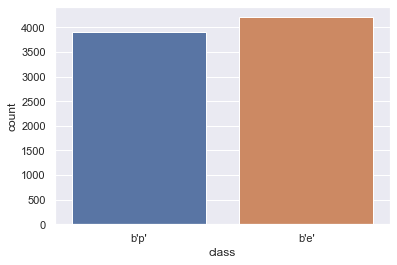

In [4]:
sns.countplot(x = 'class', data = df)

In [6]:
columns = df.columns
columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

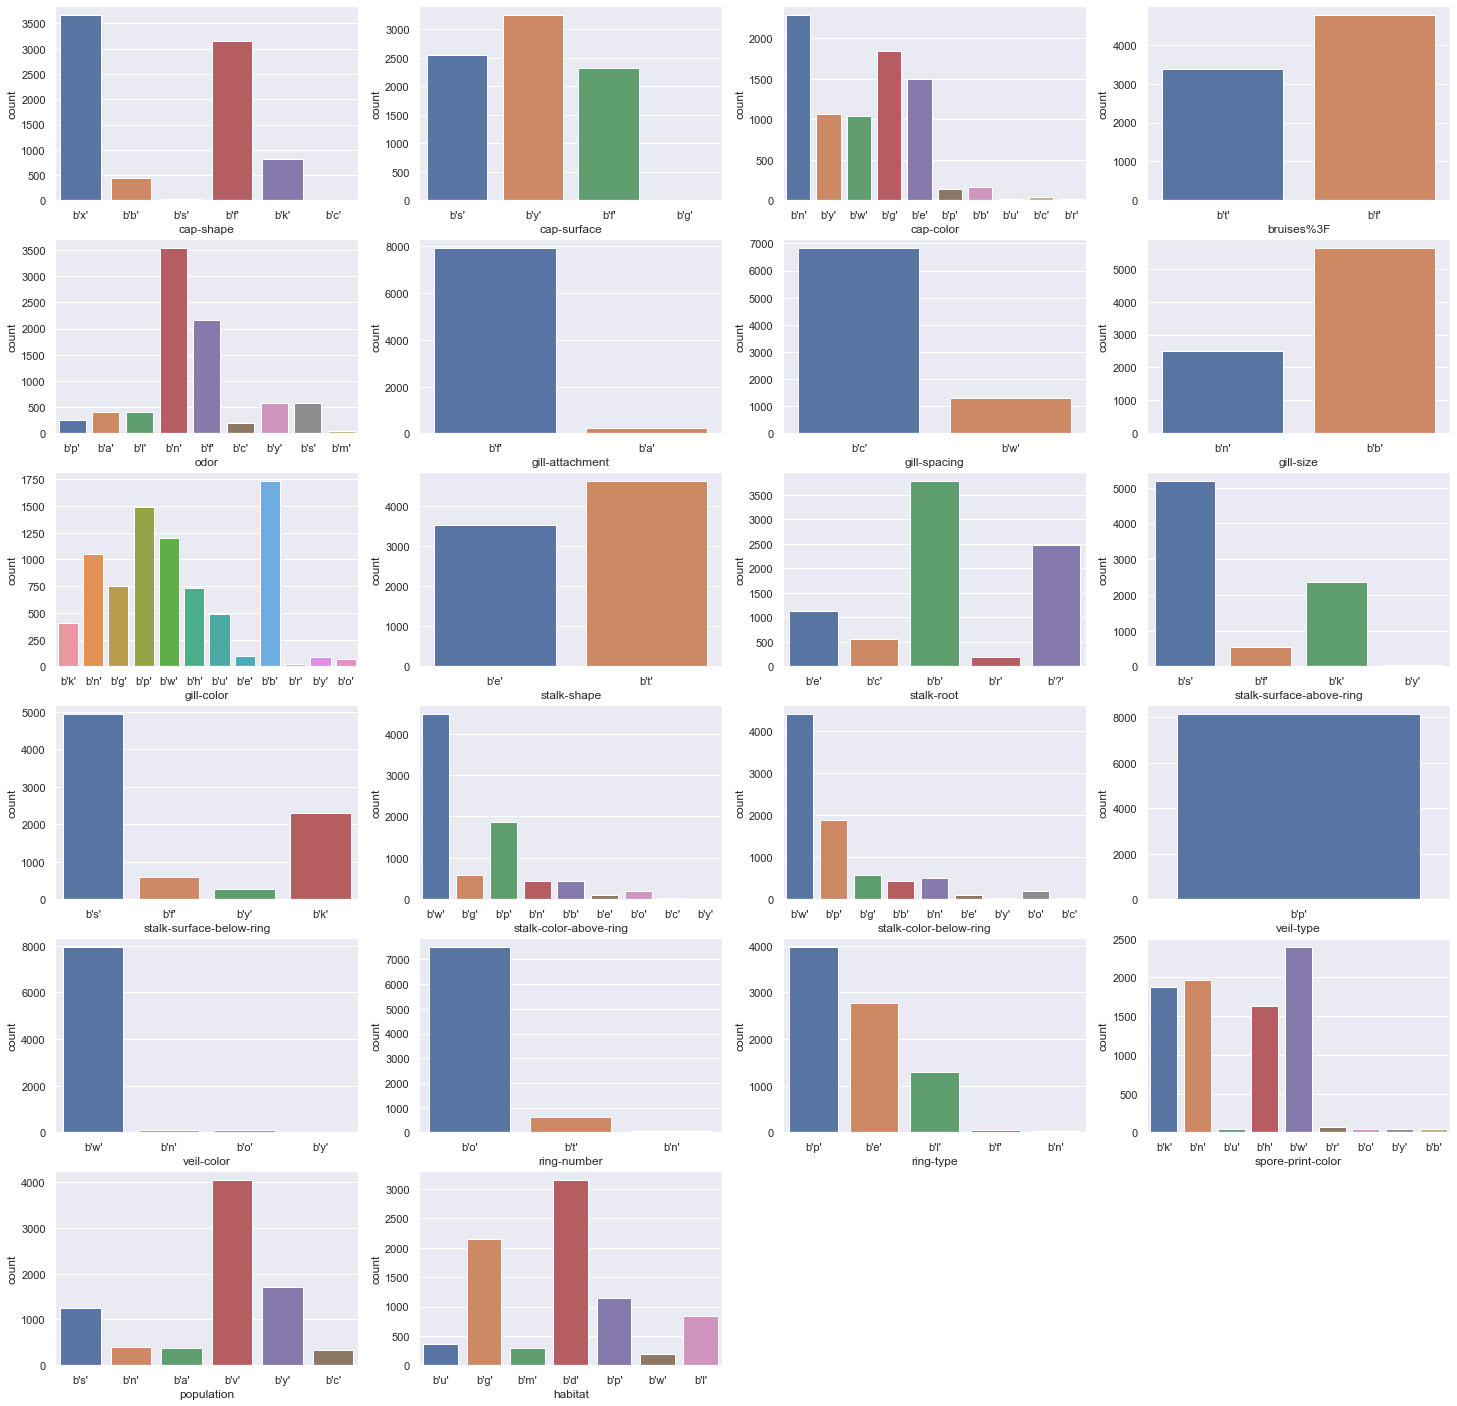

In [8]:
plt.figure(figsize = (25, 25))

for i in range(0, len(columns)-1):
    plt.subplot(6, 4, i+1)
    sns.countplot(x = columns[i], data = df)

# Preprocessing the data

In [16]:
#create a function that will return the values that have less than 25% frequency

def dim_reduction(column):
    count = df[column].value_counts()
    value_25 = np.quantile(df[column].value_counts(), 0.25)
    index_25 = []
    
    for i in range(len(count)):
        if count.values[i] <= value_25:
            index_25.append(count.index[i])
            
    return index_25
    

In [38]:
#now we will replace those values with Other to reduce dimensionality

def replace_values25(column):
    index_25 = dim_reduction(column)
    print(f'Column: {column}, Values less than 25 percent: {index_25} ')
    
    for i in range(len(df[column])):
        if df[column][i] in index_25:
            df[column][i] = 'Other'
            
    return df[column]

In [43]:
for i in range(0, len(columns) -1):
    if len(df[columns[i]].unique()) > 2:
        df[columns[i]] = replace_values25(columns[i])

Column: cap-shape, Values less than 25 percent: ["b's'", "b'c'"] 
Column: cap-surface, Values less than 25 percent: ["b'g'"] 
Column: cap-color, Values less than 25 percent: ["b'c'", "b'u'", "b'r'"] 
Column: odor, Values less than 25 percent: ["b'p'", "b'c'", "b'm'"] 
Column: gill-color, Values less than 25 percent: ["b'y'", "b'o'", "b'r'"] 
Column: stalk-root, Values less than 25 percent: ["b'c'", "b'r'"] 
Column: stalk-surface-above-ring, Values less than 25 percent: ["b'y'"] 
Column: stalk-surface-below-ring, Values less than 25 percent: ["b'y'"] 
Column: stalk-color-above-ring, Values less than 25 percent: ["b'e'", "b'c'", "b'y'"] 
Column: stalk-color-below-ring, Values less than 25 percent: ["b'e'", "b'c'", "b'y'"] 
Column: veil-color, Values less than 25 percent: ["b'y'"] 
Column: ring-number, Values less than 25 percent: ["b'n'"] 
Column: ring-type, Values less than 25 percent: ["b'f'", "b'n'"] 
Column: spore-print-color, Values less than 25 percent: ["b'u'", "b'o'", "b'y'", "b'

In [44]:
df

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,b'x',b's',b'n',b't',Other,b'f',b'c',b'n',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
1,b'x',b's',b'y',b't',b'a',b'f',b'c',b'b',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'g',b'e'
2,b'b',b's',b'w',b't',b'l',b'f',b'c',b'b',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',Other,b'e'
3,b'x',b'y',b'w',b't',Other,b'f',b'c',b'n',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
4,b'x',b's',b'g',b'f',b'n',b'f',b'w',b'b',b'k',b't',...,b'w',b'w',b'p',b'w',b'o',b'e',b'n',Other,b'g',b'e'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,b'k',b's',b'n',b'f',b'n',b'a',b'c',b'b',Other,b'e',...,b'o',b'o',b'p',b'o',b'o',b'p',Other,Other,b'l',b'e'
8120,b'x',b's',b'n',b'f',b'n',b'a',b'c',b'b',Other,b'e',...,b'o',b'o',b'p',b'n',b'o',b'p',Other,b'v',b'l',b'e'
8121,b'f',b's',b'n',b'f',b'n',b'a',b'c',b'b',b'n',b'e',...,b'o',b'o',b'p',b'o',b'o',b'p',Other,Other,b'l',b'e'
8122,b'k',b'y',b'n',b'f',b'y',b'f',b'c',b'n',b'b',b't',...,b'w',b'w',b'p',b'w',b'o',b'e',b'w',b'v',b'l',b'p'


In [52]:
#create separate lists 
multivalue_cols = []
binary_cols = []

for i in range(len(columns) -1):
    if len(df[columns[i]].unique()) > 2:
        multivalue_cols.append(columns[i])
        
    elif len(df[columns[i]].unique()) == 2:
        binary_cols.append(columns[i])
        
    else:
        continue
        
print(f'Binary columns: {binary_cols}')
print(f'Multivalue_columns: {multivalue_cols}')
    

Binary columns: ['bruises%3F', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-shape']
Multivalue_columns: ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [53]:
d = pd.DataFrame()
d

""


In [54]:
#for creating dummies for binary columns

for i in range(0, len(binary_cols)):
    dummy_df = pd.get_dummies(df[binary_cols[i]], prefix = binary_cols[i], drop_first = True)
    d = pd.concat([d, dummy_df], axis = 1)
    print(binary_cols[i])
    
d

bruises%3F
gill-attachment
gill-spacing
gill-size
stalk-shape


,bruises%3F_b't',gill-attachment_b'f',gill-spacing_b'w',gill-size_b'n',stalk-shape_b't'
0,1,1,0,1,0
1,1,1,0,0,0
2,1,1,0,0,0
3,1,1,0,1,0
4,0,1,1,0,1
...,...,...,...,...,...
8119,0,0,0,0,0
8120,0,0,0,0,0
8121,0,0,0,0,0
8122,0,1,0,1,1


In [55]:
df.drop(binary_cols, axis = 1, inplace = True)
df

,cap-shape,cap-surface,cap-color,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,b'x',b's',b'n',Other,b'k',b'e',b's',b's',b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
1,b'x',b's',b'y',b'a',b'k',Other,b's',b's',b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'g',b'e'
2,b'b',b's',b'w',b'l',b'n',Other,b's',b's',b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',Other,b'e'
3,b'x',b'y',b'w',Other,b'n',b'e',b's',b's',b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
4,b'x',b's',b'g',b'n',b'k',b'e',b's',b's',b'w',b'w',b'p',b'w',b'o',b'e',b'n',Other,b'g',b'e'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,b'k',b's',b'n',b'n',Other,b'?',b's',b's',b'o',b'o',b'p',b'o',b'o',b'p',Other,Other,b'l',b'e'
8120,b'x',b's',b'n',b'n',Other,b'?',b's',b's',b'o',b'o',b'p',b'n',b'o',b'p',Other,b'v',b'l',b'e'
8121,b'f',b's',b'n',b'n',b'n',b'?',b's',b's',b'o',b'o',b'p',b'o',b'o',b'p',Other,Other,b'l',b'e'
8122,b'k',b'y',b'n',b'y',b'b',b'?',b's',b'k',b'w',b'w',b'p',b'w',b'o',b'e',b'w',b'v',b'l',b'p'


In [56]:
e = pd.DataFrame()
e

""


In [57]:
#for creating dummies for multivalue columns

for i in range(0, len(multivalue_cols)):
    dummy_df = pd.get_dummies(df[multivalue_cols[i]], prefix = multivalue_cols[i])
    dummy_df.drop(multivalue_cols[i] + '_' + 'Other', axis = 1, inplace = True)
    e = pd.concat([e, dummy_df], axis = 1)
    print(multivalue_cols[i])
    
e

cap-shape
cap-surface
cap-color
odor
gill-color
stalk-root
stalk-surface-above-ring
stalk-surface-below-ring
stalk-color-above-ring
stalk-color-below-ring
veil-color
ring-number
ring-type
spore-print-color
population
habitat


,cap-shape_b'b',cap-shape_b'f',cap-shape_b'k',cap-shape_b'x',cap-surface_b'f',cap-surface_b's',cap-surface_b'y',cap-color_b'b',cap-color_b'e',cap-color_b'g',...,spore-print-color_b'w',population_b'n',population_b's',population_b'v',population_b'y',habitat_b'd',habitat_b'g',habitat_b'l',habitat_b'p',habitat_b'u'
0,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8120,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8121,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8122,0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [58]:
df.drop(multivalue_cols, axis = 1, inplace = True)
df

,veil-type,class
0,b'p',b'p'
1,b'p',b'e'
2,b'p',b'e'
3,b'p',b'p'
4,b'p',b'e'
...,...,...
8119,b'p',b'e'
8120,b'p',b'e'
8121,b'p',b'e'
8122,b'p',b'p'


In [59]:
f = pd.get_dummies(df['veil-type'], prefix = 'veil-type')
f

,veil-type_b'p'
0,1
1,1
2,1
3,1
4,1
...,...
8119,1
8120,1
8121,1
8122,1


Since all values are 1 we can ignore this columns

In [60]:
df.drop('veil-type', axis = 1, inplace = True)
df.head()

,class
0,b'p'
1,b'e'
2,b'e'
3,b'p'
4,b'e'


In [61]:
final_df = pd.concat([d, e, df], axis = 1)
final_df

,bruises%3F_b't',gill-attachment_b'f',gill-spacing_b'w',gill-size_b'n',stalk-shape_b't',cap-shape_b'b',cap-shape_b'f',cap-shape_b'k',cap-shape_b'x',cap-surface_b'f',...,population_b'n',population_b's',population_b'v',population_b'y',habitat_b'd',habitat_b'g',habitat_b'l',habitat_b'p',habitat_b'u',class
0,1,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,b'p'
1,1,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,b'e'
2,1,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,b'e'
3,1,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,b'p'
4,0,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,b'e'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,b'e'
8120,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,b'e'
8121,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,b'e'
8122,0,1,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,b'p'


In [62]:
final_df.isnull().sum()

bruises%3F_b't'         0
gill-attachment_b'f'    0
gill-spacing_b'w'       0
gill-size_b'n'          0
stalk-shape_b't'        0
                       ..
habitat_b'g'            0
habitat_b'l'            0
habitat_b'p'            0
habitat_b'u'            0
class                   0
Length: 78, dtype: int64

In [63]:
final_df.to_csv('mushroom_preprocessed.csv', index = False)